# 2022 2학기 머신러닝 스터디 : 앙상블 학습

<div style="text-align: right"> 정리 : 최경호 </div>

[colab에서 열기](https://colab.research.google.com/github/attagungho/knou/blob/main/ML/220904_ml_study_ensemble_boosting.ipynb)

# 앙상블 학습

## 부스팅

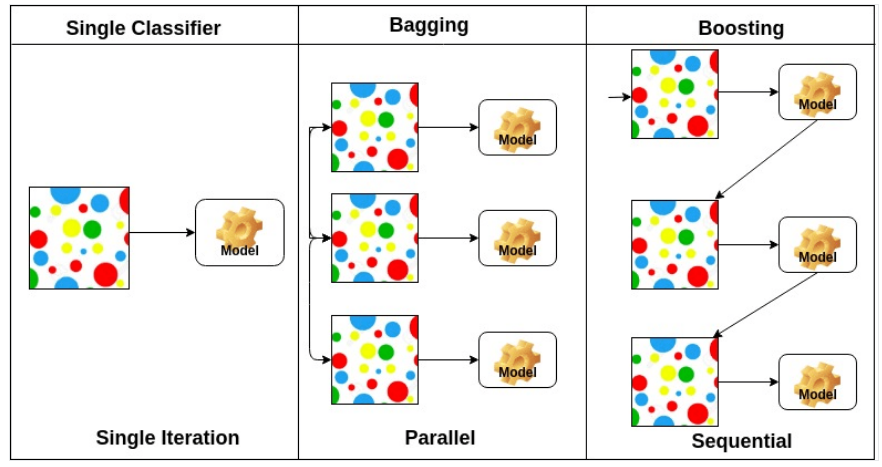

In [1]:
from IPython.display import Image
Image(filename='./data/bagging_boosting.png', width=600)

<p style='text-align: center; font-size: 70%;'>출처 : https://www.datacamp.com/tutorial/adaboost-classifier-python'<p>

+ 부스팅 모델은 학습기를 병렬적으로 학습시키는 배깅과 다르게 순차적으로 모델을 학습시키고 결합함
  + 순차적으로 모델을 학습시키기 때문에 병렬적으로 학습시키는 배깅보다 학습 소요시간이 길어짐
     
+ 먼저 학습된 학습기의 결과가 다음 학습기의 학습에 정보를 제공하여 이전 학습기의 결점을 보완하여 성능을 증폭시킴     

+ 초기에 제안된 부스팅 방법은 학습 데이터의 규모가 매우 커야 한다는 문제가 있었음
  + 이전 모델이 오답으로 예측한 데이터 + 정답으로 예측한 데이터 일부로 다음 모델을 학습시키기 때문에 이전 모델이 학습하는 데이터의 양보다 다음 모델이 학습하는 데이터 양이 줄어들음
  + 순차적으로 학습하는 모델들이 모두 충분한 양의 데이터를 학습하려면 초기의 데이터의 양이 매우 커야 함
  + 이를 보완하는 것이 AdaBoost 

### AdaBoost 분류기의 학습 (이진분류 문제)
   
+ 입력 데이터 $x_j$는 N개가 있고 동일한 수의 정답값(출력값) $t_j$와 쌍으로 존재함
$$X=\{(x_j, t_j)\}_{j=1, \cdots, N}$$
+ 이진분류문제 이므로 정답값 $t_j$는 -1 또는 1을 가짐 (개수는 N개)
$$t_j \in \{-1, 1\}(j=1, \cdots, N) $$
+ 각 데이터의 가중치 $w_j$는 동일하게 시작함
  + 1번째 모델의 가중치 $w_j^{(1)}$는 데이터의 개수가 N개 이므로 각 $1/N$ (개수는 N개)
$$w_j(j=1,\cdots,N), w_j^{(1)}=1/N$$
+ 순차적으로 M개의 모델을 학습시킬 것
$$i=1,\cdots,M $$
+ $i$번째 모델의 예측의 오분류율은 모델이 정답을 맞추지 못한 j번째 데이터에 대해 가중치$w_j^{(i)}$를 곱하여 계산함
$$\varepsilon_i은\sum_{j=1}^N {w_j^{(i)}I(h_i(x_j) \neq t_j) }$$
  + $I(h_i(x_j)\neq t_j)$ 함수는 $j$번째 데이터 $x_j$ 에 대한 $i$번째 모델의 예측이 틀렸을 때 (예측값 $h_i(x_j)$과 정답값 $t_j$ 이 동일하지 않을 때) 1, 예측이 맞았을 때 (예측값 $h_i(x_j)$과 정답값 $t_j$ 이 동일할 때) 0의 값을 갖는 함수임

+  $i$번째 모델의 오분류율 $\varepsilon_i$을 이용해 $i$번째 모델$h_i(x)$ 의 중요도 값$\alpha_i$을 계산함
$$\alpha_i = \frac{1}{2}ln\{\frac{1-\varepsilon_i}{\varepsilon_i}\}$$

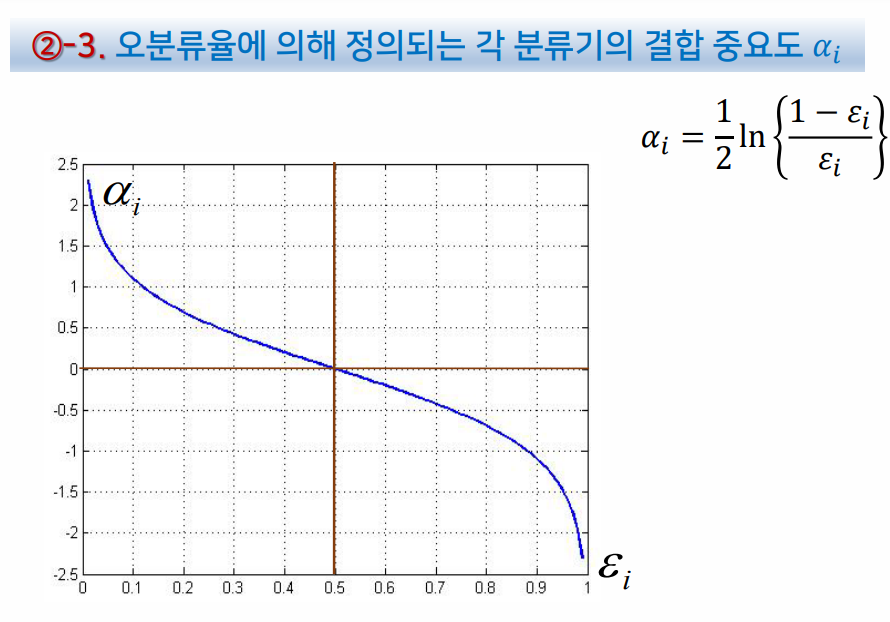

In [2]:
Image(filename='./data/adaboost_model_weight.png', width=600)

<p style='text-align: center; font-size: 70%;'>출처 : '머신러닝 6강 강의록', 22p, 한국방송통신대학교'<p>

+ 다음번 모델의 가중치 $w_j^{(i+1)}$는 이번기 가중치$w_j^{(i)}$를 이번기 모델의 오류율 $\varepsilon_i$과 이번기 모델이 정답을 맞췄는지에 따라 조정함

$$w_j^{(i+1)}=\frac{w_j^{(i)}exp\{-\alpha_i t_j h_i(x_j)\}}{\sum_{j=1}^N{w_j^{(i)}exp\{-\alpha_i t_j h_i(x_j)\}   }}$$

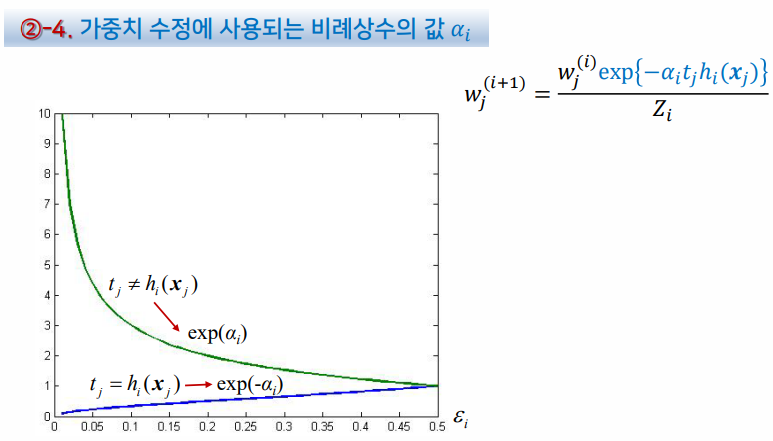

In [3]:
Image(filename='./data/adaboost_weight_adjust.png', width=600)

<p style='text-align: center; font-size: 70%;'>출처 : '머신러닝 6강 강의록', 23p, 한국방송통신대학교'<p>
   
[그래프확인](https://www.desmos.com/calculator/feifxgydns)

+ M개의 학습기가 모두 학습되면 각 분류기의 중요도 $\alpha_i$값을 이용하여 M개의 분류기$h_i(x)$를 결합한 최종 판별함수를 만들음

### AdaBoost 정리
+ 이전 단계 모델의 학습결과를 활용하여 다음 단계 모델의 학습에 활용할 가중치를 부여하여 모델 간의 차별성 부여(배깅의 학습할 데이터를 다르게 하여 모델간 차별성을 부여하는 것과의 차이점)
+ 각 모델의 오분류율이 0.5 보다 작다는 조건(랜덤 분류보다 조금이라도 성능이 좋다는 조건)만 만족하면 모델의 결합을 통해 학습데이터에 대한 오차를 기하급수적으로 감소시킬 수 있음을 보임(by Fruend & Schapire) [참고자료](https://cseweb.ucsd.edu/~yfreund/papers/boostingexperiments.pdf)
+ 모델의 오분류율에 따라 최적화된 결합 가중치를 결정함
+ 이진분류에 적합한 방법

## 앙상블 모델 결합방법

### 일반적인 결합방법
+ 평균법 
  + 모델의 출력이 수치형일 때 적합함 ex) 회귀문제
  + 단순평균, 가중평균
+ 보팅법
  + 분류 문제에서 주로 사용
  + 다수결 투표, 가중 투표
  + 모델의 출력 유형에 따라 하드보팅, 소프트보팅
    + 하드보팅은 모델이 이산적인 값으로 데이터를 분류함
    + $h(x) \in \{0, 1\}$
    + 소프트보팅은 모델이 연속적인 값으로 데이터를 분류함
    + 해당 클래스에 속할 확률로 해석 가능
    + $h(x) \in [0, 1]$

### 캐스케이딩 결합
+ 복잡도가 상이한 모델을 순차적인 결합으로 학습시키는 방법
+ 쉬운 문제는 복잡도가 낮은 모델로 해결하고
+ 신뢰도가 낮거나 오류가 발생한 데이터는 그 보다 높은 복잡도를 갖는 모델로 학습하여 해결함
+ 학습 후 예측단계에서 쉬운 문제는 복잡도가 낮은 모델로 적은 연산으로 해결하도록 하여 계산시간 줄임

### 전문가 혼합
+ 입력 변수의 영역에 따라 그 영역을 담당하는 모델을 나눠서 학습시킴
+ 그 영역에 대해 전문적으로 담당하여 문제를 해결한다 하여 전문가 혼합
+ 모델이 담당하는 영역은 임의로 결정할 수도 있고 모델의 학습에 따라 결정하게 할 수도 있음
+ 입력값의 공간에 따라 모델을 나눠 학습시키면 모델 간 상관관계가 줄어들거나 음의 상관관계를 갖게되어 일반화 오차를 감소시키게 됨

In [4]:
# !pip install xgboost
# !pip install lightgbm
# !pip install catboost
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

/opt/conda/envs/mlstudy/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [5]:
data = load_iris()
input_12 = data.data[:100, :2]
target_12 = data.target[:100]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(input_12, target_12, test_size=0.2, random_state=1008)

In [7]:
bag_clf = BaggingClassifier()
adb_clf = AdaBoostClassifier()
xgb_clf = XGBClassifier(use_label_encoder=False)
lgb_clf = LGBMClassifier()
cat_clf = CatBoostClassifier(verbose=False)

classifiers = [bag_clf, adb_clf, xgb_clf, lgb_clf, cat_clf]
for classifier in classifiers:
    class_name = classifier.__class__.__name__
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    print(f'{class_name} 정확도: {accuracy_score(y_test, pred):.4f}')


BaggingClassifier 정확도: 0.8500
AdaBoostClassifier 정확도: 0.9000
[05:35:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 정확도: 0.9500
LGBMClassifier 정확도: 0.9000
CatBoostClassifier 정확도: 0.9000


In [8]:
voting_clf = VotingClassifier(
    estimators= [
        ('Bagging', bag_clf),
        ('AdaBoost', adb_clf),
        ('XGBoost', xgb_clf),
        ('lightGBM', lgb_clf),
        ('catBoost', cat_clf)
    ], voting='soft'
)

voting_clf.fit(X_train, y_train)
pred = voting_clf.predict(X_test)
print(f'voting 분류기 정확도: {accuracy_score(y_test, pred):.4f}')

[05:35:33] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
voting 분류기 정확도: 0.9000


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_boundary(model, X, y, model_name):
    fig, ax = plt.subplots()
    ax.scatter(
        X[:,0], X[:,1], c=y, s=25, cmap='rainbow',
        clim=(y.min(), y.max())
    )
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    model.fit(X, y)
    xx, yy = np.meshgrid(
        np.linspace(xlim_start, xlim_end, num=200),
        np.linspace(ylim_start, ylim_end, num=200)
    )
    pred = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, pred, alpha=0.3)
    plt.title(model_name)
    plt.show()

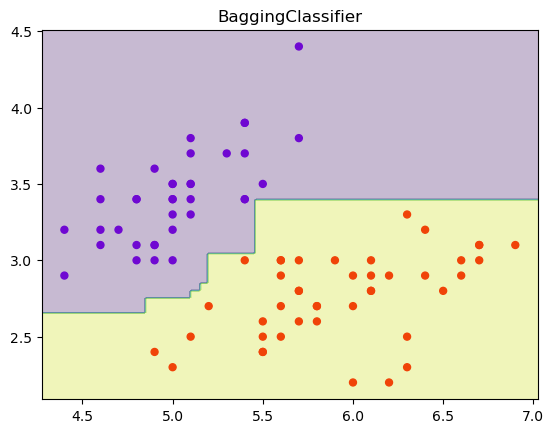

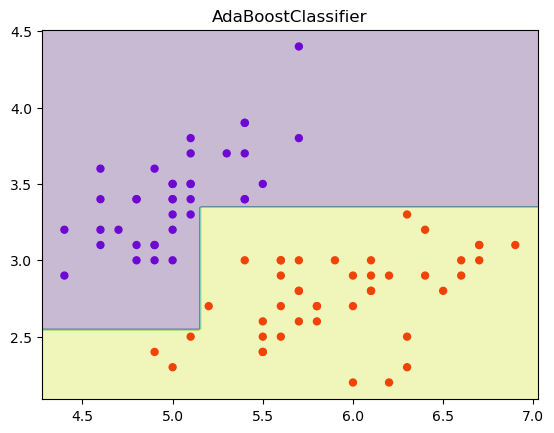

[05:35:41] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


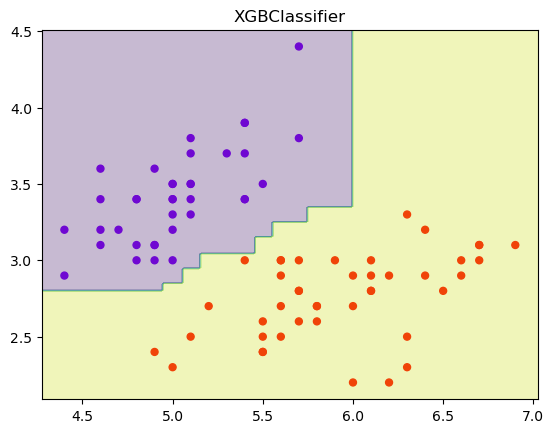

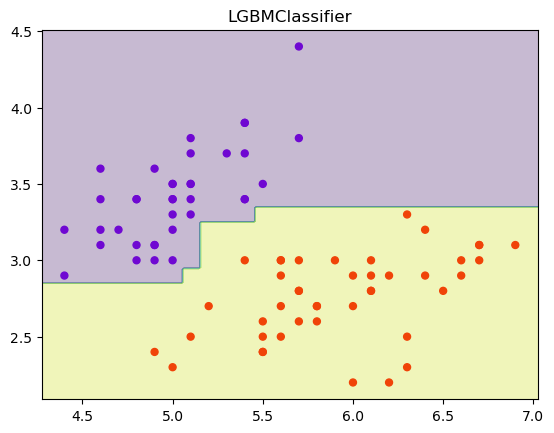

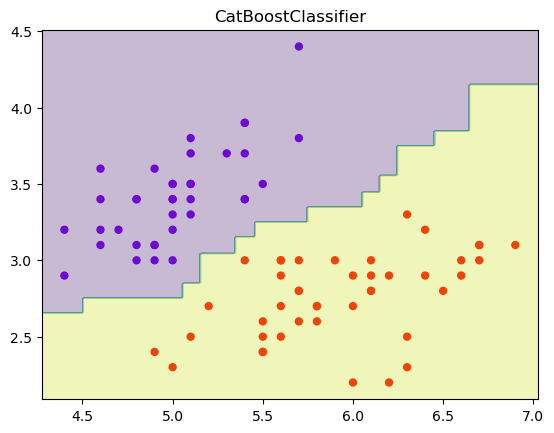

In [10]:
for classifier in classifiers:
    visualize_boundary(classifier, X_train, y_train, classifier.__class__.__name__)

[05:35:49] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


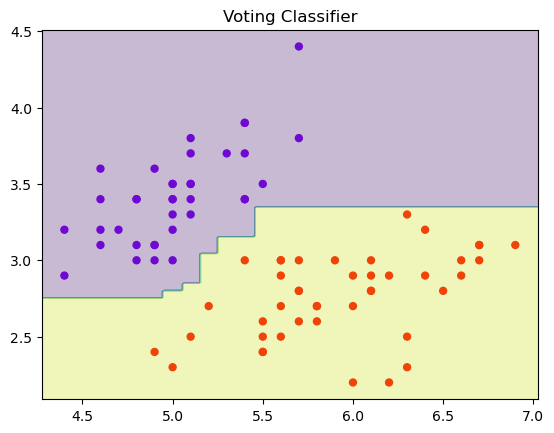

In [11]:
visualize_boundary(voting_clf, X_train, y_train, 'Voting Classifier')